In [1]:
!python3 -m pip install -U gensim

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [2]:
from gensim.models import Word2Vec
from gensim.models import FastText
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
# import plotly.graph_objects as go

import warnings

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

# ------------------------------------------------------------


warnings.filterwarnings('ignore')


<BarContainer object of 8 artists>

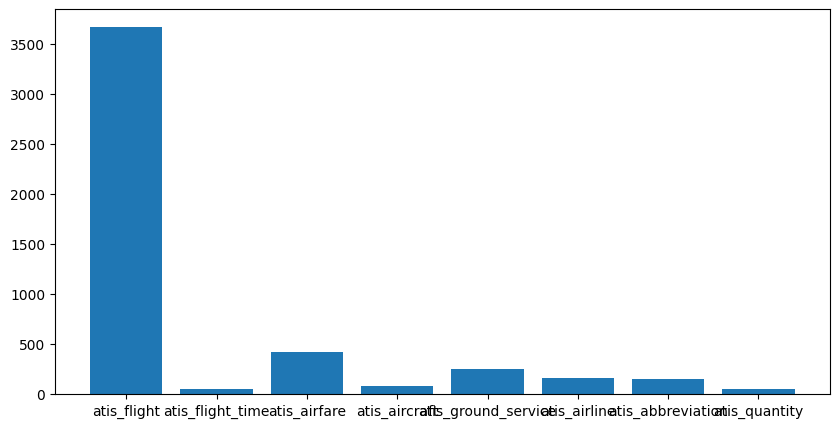

In [48]:
import pandas as pd

train_df = pd.read_csv('atis_intents_train.csv', names=['intent','text'])

x = train_df['intent'].drop_duplicates()
y = [len(train_df[train_df['intent'] == intent]) for intent in x]
y = []
for intent in x:
  y.append(len(train_df[train_df['intent'] == intent]))

plt.figure(figsize=(10,5))
plt.bar(x,y)



1145

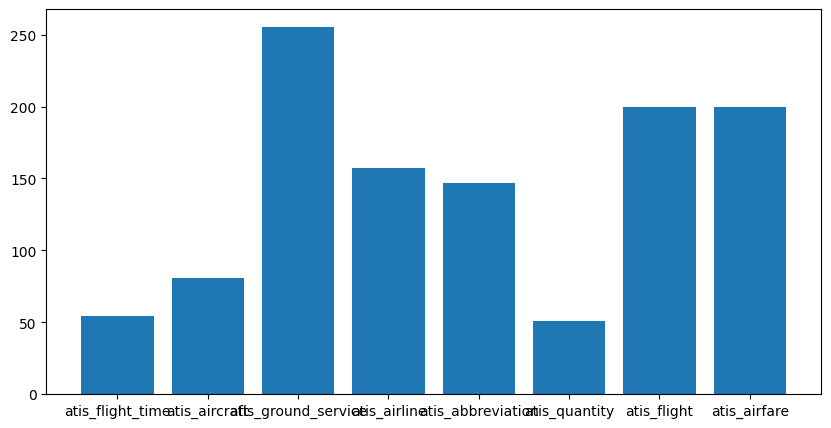

In [49]:

reduced_flight = train_df[train_df['intent'] == 'atis_flight'][:200]
train_df = train_df[train_df['intent'] != 'atis_flight']
train_df = pd.concat([train_df,reduced_flight], axis=0)
train_df[train_df['intent'] == 'atis_flight']


reduced_airfare = train_df[train_df['intent'] == 'atis_airfare'][:200]
train_df = train_df[train_df['intent'] != 'atis_airfare']
train_df = pd.concat([train_df,reduced_airfare], axis=0)
train_df[train_df['intent'] == 'atis_airfare']


x = train_df['intent'].drop_duplicates()
y = [len(train_df[train_df['intent'] == intent]) for intent in x]
y = []
for intent in x:
  y.append(len(train_df[train_df['intent'] == intent]))

plt.figure(figsize=(10,5))
plt.bar(x,y)

len(train_df)

In [50]:
clean_text = []
for text in train_df['text']:
   clean = text.lower()

   #remove punctuation
   clean = re.sub('[^a-zA-Z]', ' ', clean)

   #remove tags
   clean = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", clean)

   #remove digits and special chars
   clean = re.sub("(\\d|\\W)+", " ", clean)
   clean_text.append(clean)

train_df['clean'] = clean_text
train_df.head()

,intent,text,clean
2,atis_flight_time,what is the arrival time in san francisco for...,what is the arrival time in san francisco for...
6,atis_aircraft,what kind of aircraft is used on a flight fro...,what kind of aircraft is used on a flight fro...
9,atis_ground_service,what kind of ground transportation is availab...,what kind of ground transportation is availab...
15,atis_ground_service,show me the ground transportation in denver,show me the ground transportation in denver
22,atis_aircraft,what kinds of planes are used by american air...,what kinds of planes are used by american air...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
corpus = train_df['clean']

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names())


CountVectorizedData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Intent'] = train_df['intent']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(1145, 385)


,aa,abbreviation,abbreviations,ac,advertises,afternoon,air,aircraft,airfare,airline,...,week,weekday,weekdays,west,westchester,worth,yn,york,yyz,Intent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,atis_flight
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,atis_flight
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,atis_flight_time
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,atis_airfare
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,atis_airfare


In [52]:
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# import random
# word = 'bro'
    
# topnum = 100
 
# for i in range(10):   
#     word = random.choice(GoogleModel.most_similar(word, topn=topnum))[0]
#     while word in ['questlove_@', 'questlove']:
#         word = random.choice(GoogleModel.most_similar(word, topn=topnum))[0]
#     print(word)  
    


In [ ]:
WordsVocab = CountVectorizedData.columns[:-1]
WordsVocab[:10]

Index(['aa', 'abbreviation', 'abbreviations', 'ac', 'advertises', 'afternoon',
       'air', 'aircraft', 'airfare', 'airline'],
      dtype='object')

In [ ]:
def corpus_to_vecs(text):
    # Converting the text to numeric data
    X = vectorizer.transform(text)
    CountVecData=pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    w2vec_data = pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i,:]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                sentence += GoogleModel[word]
        # Appending the sentence to the dataframe
        w2vec_data=w2vec_data.append(pd.DataFrame([sentence]))
    return(w2vec_data)



    

word2vec_data = corpus_to_vecs(train_df['clean'])

In [ ]:
print(word2vec_data.shape, CountVectorizedData.shape)

(1145, 300) (1145, 385)


In [ ]:
# Adding the target variable
word2vec_data.reset_index(inplace=True, drop=True)
word2vec_data['Intent'] = CountVectorizedData['Intent']
 
# Assigning to DataForML variable
DataForML = word2vec_data
DataForML.dropna()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Intent
0,-0.121582,0.939209,-0.221008,0.315430,-0.037790,-0.536011,-0.911621,-1.098022,0.528748,0.464661,...,0.491390,0.183594,0.476685,1.004395,-0.418945,-1.130127,-0.492325,-0.227783,-0.015015,atis_flight
1,0.047119,0.545410,0.334961,1.017700,-0.344238,-0.550049,-0.583008,-1.340820,0.741119,-0.074829,...,0.499939,0.356201,0.378967,-0.006226,-0.538574,-0.477051,0.375000,-0.010681,-0.237183,atis_flight
2,-0.153931,-0.567627,0.027832,0.754395,-0.680908,-0.381836,0.126953,-0.463379,0.513885,0.027466,...,-0.286255,0.351562,0.423950,0.582764,0.062500,-0.103394,-0.399292,0.189026,0.270874,atis_flight_time
3,-0.224731,-0.392578,0.174561,0.211426,-0.314697,-0.419434,-0.286133,-0.271484,0.094971,-0.061035,...,-0.174438,0.379883,0.268555,0.439209,-0.098633,-0.190308,-0.290405,0.157715,0.401855,atis_airfare
4,0.475403,0.219238,0.639632,1.523926,-1.023438,-0.843750,-0.484497,-0.131836,0.780640,-0.113586,...,-0.404602,0.333008,0.337097,0.148926,-0.209961,-0.105957,0.458984,0.280701,-0.363770,atis_airfare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.203857,0.637085,0.016357,0.670654,-0.061035,-0.250732,-1.029297,-0.201904,0.157257,0.025757,...,-0.133545,-0.000854,0.453491,0.790527,0.114563,-0.343262,-0.226807,1.211639,-0.605225,atis_ground_service
1126,-0.099976,0.037109,0.461548,0.512817,0.264160,0.248291,-0.584473,-0.369629,0.612976,0.543701,...,-0.025269,0.188385,0.769585,0.062012,-0.244873,-0.848389,-0.552246,-0.377441,0.593750,atis_airfare
1132,-0.291260,0.865601,-0.069580,1.441406,-0.113647,0.091187,-0.023438,-0.376465,0.042114,0.618530,...,0.384583,0.029053,0.945801,-0.061272,0.451050,-0.443176,-0.028687,0.178558,0.326050,atis_abbreviation
1137,-0.072388,-0.519043,0.048981,1.013794,0.240784,-0.427246,-0.408691,-0.488617,0.470215,0.385193,...,0.214417,0.465088,0.592407,0.528259,0.030029,-0.535217,-0.898315,-0.291016,0.092041,atis_abbreviation


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = DataForML.columns[-1]
Predictors = DataForML.columns[:-1]
 
X = DataForML[Predictors].values
y = DataForML[TargetVariable].values
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(801, 300)
(801,)
(344, 300)
(344,)


Performing ML

In [ ]:
# from sklearn import tree


# clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# DTree = clf.fit(X_train,y_train)
# prediction=DTree.predict(X_test)

X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

print(y.dropna())

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'